In [1]:
import numpy as np
import xarray as xr
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

/home/lucas/anaconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


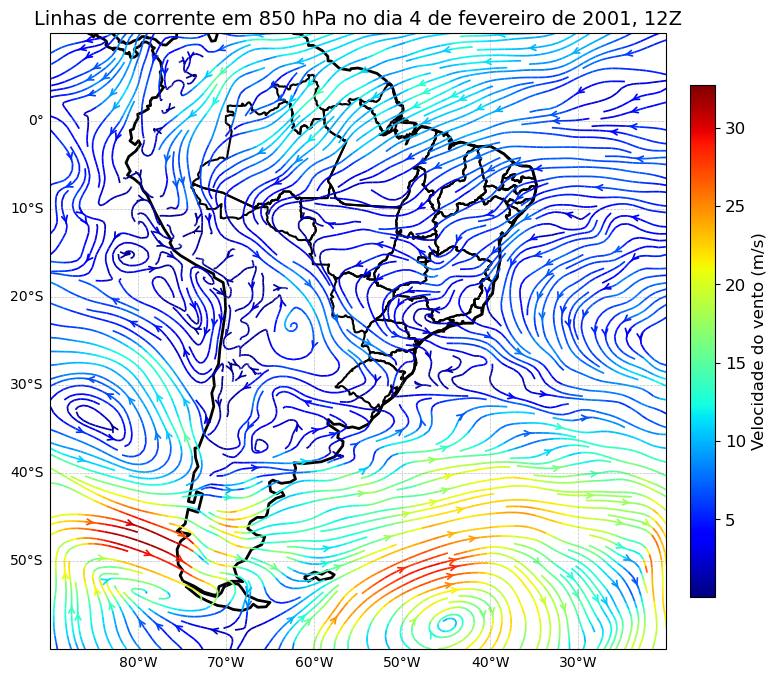

In [22]:
ds = xr.open_dataset('u_v_850hpa.nc')
u = ds['u']
v = ds['v']
lon, lat = np.meshgrid(u.longitude, u.latitude)
vel = np.sqrt(u**2 + v**2)
# vel = ds['vel']
time = ds['time']

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, -20, -60, 10], ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, color='black', linewidth=2)
ax.add_feature(cfeature.COASTLINE, color='black', linewidth=2)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1.5)
# ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
# ax.add_feature(cfeature.LAKES, alpha=1.0)
# ax.add_feature(cfeature.LAND, facecolor='lightgray')

gd = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True, alpha=0.5, linewidth=0.5)
gd.right_labels = False
gd.top_labels = False

stream = ax.streamplot(lon, lat, u.isel(time=0), v.isel(time=0), color=vel.isel(time=0).values,
                        cmap='jet', linewidth=1.25, density=3, arrowsize=1, arrowstyle='->', transform=ccrs.PlateCarree())

ax.set_title('Linhas de corrente em 850 hPa no dia 4 de fevereiro de 2001, 12Z', size=14)
cbar = fig.colorbar(stream.lines, ax=ax, pad=0.03, fraction=0.033)
cbar.set_label(label='Velocidade do vento (m/s)', size=12)
cbar.ax.tick_params(labelsize=12)

plt.show()

/home/lucas/anaconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


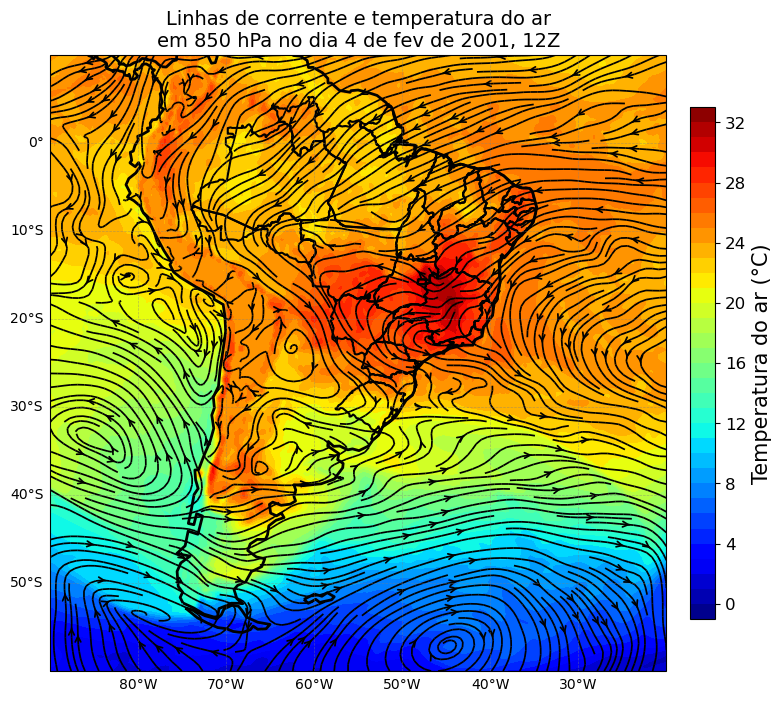

In [35]:
ds_t = xr.open_dataset('temperature_850hpa.nc')
t = ds_t['t'] - 273.15
ds = xr.open_dataset('u_v_850hpa.nc')
u = ds['u']
v = ds['v']
lon, lat = np.meshgrid(u.longitude, u.latitude)
vel = np.sqrt(u**2 + v**2)
# vel = ds['vel']
time = ds['time']

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, -20, -60, 10], ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, color='black', linewidth=2)
ax.add_feature(cfeature.COASTLINE, color='black', linewidth=2)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1.5)
# ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
# ax.add_feature(cfeature.LAKES, alpha=1.0)
# ax.add_feature(cfeature.LAND, facecolor='lightgray')

gd = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True, alpha=0.5, linewidth=0.5)
gd.right_labels = False
gd.top_labels = False

im = ax.contourf(lon, lat, t.isel(time=0), 
                 levels=np.arange(int(t.min().values)-1, int(t.max().values)+2, 1), cmap='jet',
                 transform=ccrs.PlateCarree())

stream = ax.streamplot(lon, lat, u.isel(time=0), v.isel(time=0), color='black',
                        cmap='jet', linewidth=1.25, density=3, arrowsize=1, arrowstyle='->', transform=ccrs.PlateCarree())

cbar = plt.colorbar(im, ax=ax, pad=0.03, fraction=0.033)
cbar.set_label(label='Temperatura do ar (°C)', size=15)
cbar.ax.tick_params(labelsize=12)

ax.set_title('Linhas de corrente e temperatura do ar\nem 850 hPa no dia 4 de fev de 2001, 12Z', size=14)

plt.show()

/home/lucas/anaconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


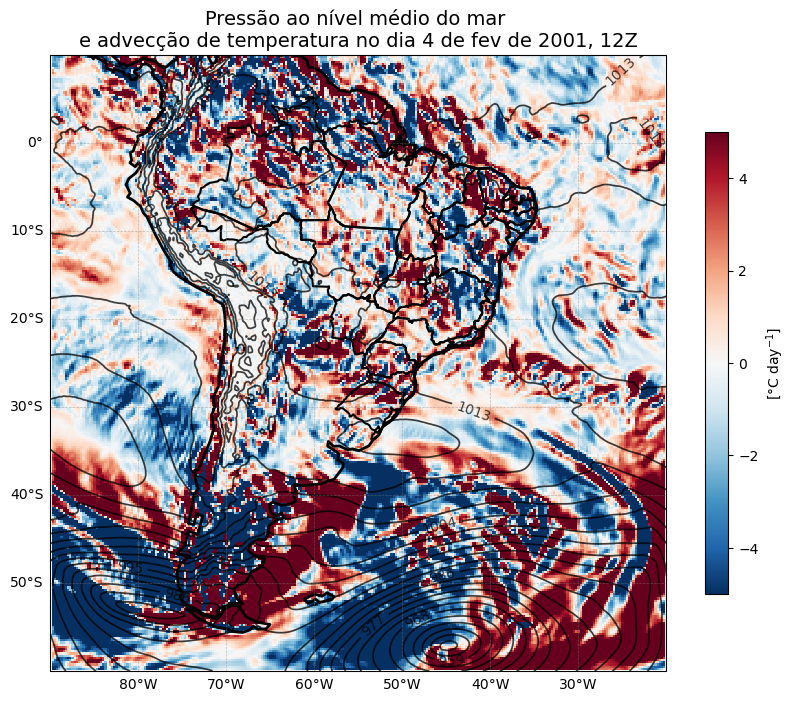

In [2]:
ds = xr.open_dataset('surface_pressure_MSL.nc')
ds['msl'] = ds['msl'] / 100
sp = ds['msl']
# lon, lat = np.meshgrid(sp.longitude, sp.latitude)

time = ds['time']


import sys
sys.path.append('/media/lucas/DADOS HITACHI/Scripts para o github/plot_linha_de_corrente/mygrads')
import mygrads as mg

ds_t = xr.open_dataset('temperature_850hpa.nc')
ds_t['t'] = ds_t['t'] - 273.15
ds_uv = xr.open_dataset('u_v_850hpa.nc')

lat = ds['latitude'].values
lon = ds['longitude'].values
u = ds_uv['u'][0,:].values
v = ds_uv['v'][0,:].values
t = ds_t['t'][0,:].values
np.shape(t)
tadv = mg.hadv(u,v,t,lat,lon)


fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, -20, -60, 10], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='black', linewidth=2)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1.5)
mesh = ax.pcolormesh(lon, lat, tadv*86400, vmin=-5,vmax=5, transform=ccrs.PlateCarree(), cmap="RdBu_r")
cbar=plt.colorbar(mesh, shrink=0.75,label='[°C day$^{-1}$]')


# fig = plt.figure(figsize=(10, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-90, -20, -60, 10], ccrs.PlateCarree())
# # ax.add_feature(cfeature.BORDERS, color='black', linewidth=2)
# ax.add_feature(cfeature.COASTLINE, color='black', linewidth=2)
# ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1.5)
# # ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
# # ax.add_feature(cfeature.LAKES, alpha=1.0)
# # ax.add_feature(cfeature.LAND, facecolor='lightgray')

gd = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True, alpha=0.5, linewidth=0.5)
gd.right_labels = False
gd.top_labels = False

levels = np.arange(int(sp.min().values)-1, int(sp.max().values)+1, 3)

im = ax.contour(lon, lat, sp.isel(time=0), 
                 levels=levels, colors='black', alpha=0.75, linewidths=1.25,
                 transform=ccrs.PlateCarree())


# Adiciona os rótulos das isóbaras
labels = ax.clabel(im, inline=1, fontsize=10, levels=levels[::3])

ax.set_title('Pressão ao nível médio do mar \ne advecção de temperatura no dia 4 de fev de 2001, 12Z', size=14)

plt.show()